In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split


/var/folders/xp/fz2y6v551b1fx3vf1wzts5w00000gn/T/ipykernel_1944/1994314660.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df=pd.read_csv('data_D.csv')

In [3]:
df.head(10)

,Unnamed: 0,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
0,0,106473,15639576,Sarratt,652.0,France,Female,65.0,3,0.00,2,1,1,136592.24,0
1,1,62345,15769582,Hanson,464.0,France,Male,35.0,4,0.00,1,0,0,99505.75,1
2,2,126615,15675888,Austin,620.0,Germany,Female,39.0,6,129401.87,2,1,1,102681.32,1
3,3,35909,15786617,Tuan,598.0,France,Female,30.0,7,0.00,2,1,0,141210.18,0
4,4,45175,15757310,Li Fonti,682.0,Germany,Female,46.0,4,107720.57,1,0,0,93832.33,1
5,5,164567,15585388,Trevisan,746.0,France,Female,24.0,1,0.00,2,0,0,130142.42,0
6,6,131432,15802568,Stevenson,636.0,France,Female,45.0,6,0.00,1,1,0,51695.41,1
7,7,28912,15621075,Ogbonnaya,685.0,France,Female,54.0,6,0.00,2,0,1,167023.95,0
8,8,115072,15581332,Onyemauchechukwu,809.0,Germany,Male,39.0,9,93360.74,2,1,0,183816.31,0
9,9,130441,15722758,Tuan,439.0,France,Female,54.0,1,164902.65,1,0,0,137946.02,1


In [4]:
df.shape

(41259, 15)

Dataset ini terdiri dari 15 kolom dan 41259 records.

In [5]:
df.columns

Index(['Unnamed: 0', 'id', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'churn'],
      dtype='object')

Pada dataset ini terdapat 15 kolom yang meliputi: Unnamed: 0, id, CustomerId, Surname, CreditScore, Geography, Gender', Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, dan churn

In [6]:
df.describe()

,Unnamed: 0,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
count,41259.000000,41259.000000,4.125900e+04,41251.000000,41259.000000,41259.000000,41259.000000,41259.000000,41259.000000,41259.000000,41259.000000,41259.000000
mean,20629.000000,82171.693231,1.569221e+07,656.278733,38.060254,4.999127,55712.496615,1.554328,0.754405,0.496667,112308.502138,0.211324
std,11910.591715,47498.739183,7.137974e+04,80.062353,8.801094,2.802930,62858.019091,0.545629,0.430445,0.499995,50367.874510,0.408252
min,0.000000,3.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,10314.500000,41098.500000,1.563347e+07,598.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74580.800000,0.000000
50%,20629.000000,81851.000000,1.569013e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117036.380000,0.000000
75%,30943.500000,123064.500000,1.575714e+07,710.000000,42.000000,7.000000,120165.300000,2.000000,1.000000,1.000000,154811.290000,0.000000
max,41258.000000,165033.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [7]:
df = df.drop(['Unnamed: 0', 'id', 'CustomerId', 'Surname'], axis=1)

Dalam membuat model ini, saya tidak menggunakan fitur Unnamed: 0, id, CustomerId, dan Surname. Hal ini saya lakukan karena fitur-fitur tersebut meaningless terhadap model.

Unnamed: 0 hanya berisi urutan index, sedangkan untuk id, CustomerId, dan Surname hanya menggandung identitas dari customer.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41259 entries, 0 to 41258
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      41251 non-null  float64
 1   Geography        41259 non-null  object 
 2   Gender           41259 non-null  object 
 3   Age              41259 non-null  float64
 4   Tenure           41259 non-null  int64  
 5   Balance          41259 non-null  float64
 6   NumOfProducts    41259 non-null  int64  
 7   HasCrCard        41259 non-null  int64  
 8   IsActiveMember   41259 non-null  int64  
 9   EstimatedSalary  41259 non-null  float64
 10  churn            41259 non-null  int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 3.5+ MB


In [9]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
count,41251.000000,41259.000000,41259.000000,41259.000000,41259.000000,41259.000000,41259.000000,41259.000000,41259.000000
mean,656.278733,38.060254,4.999127,55712.496615,1.554328,0.754405,0.496667,112308.502138,0.211324
std,80.062353,8.801094,2.802930,62858.019091,0.545629,0.430445,0.499995,50367.874510,0.408252
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,598.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74580.800000,0.000000
50%,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117036.380000,0.000000
75%,710.000000,42.000000,7.000000,120165.300000,2.000000,1.000000,1.000000,154811.290000,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


Target variabel pada data ini adalah churn, yang mana valuenya binary 0 dan 1. 1 mengindikasin customer churn sedangkan 0 sebaliknya.

Credit score memiliki rata-rata sebesar 656.28 dengan standar deviasi sebesar 80.06. Nilai minimumnya adalah 350.00, nilai maksimumnya adalah 850.00, dan kuartil pertamanya adalah 598.00, sementara mediannya adalah 659.00, dan kuartil ketiganya adalah 710.00.

Variabel Age rata-ratanya adalah 38.06 tahun, dengan standar deviasi sebesar 8.80 tahun. Nilai minimum usia pelanggan adalah 18 tahun, sedangkan nilai maksimumnya adalah 92 tahun. Kuartil pertama usia adalah 32 tahun, mediannya adalah 37 tahun, dan kuartil ketiganya adalah 42 tahun.

Tenure rata-ratanya adalah sekitar 4.999, dengan standar deviasi sebesar 2.803. Nilai minimum masa jabatan adalah 0, sedangkan nilai maksimumnya adalah 10. Kuartil pertamanya adalah 3, mediannya adalah 5, dan kuartil ketiganya adalah 7.

Balance rata-ratanya adalah 55,712.50 satuan mata uang, dengan standar deviasi sebesar 62,858.02 satuan mata uang. Nilai minimum saldo adalah 0.00, dan nilai maksimumnya adalah 250,898.09 satuan mata uang. Kuartil pertamanya dan medianya 0, dan kuartil ketiganya adalah 120,165.30 satuan mata uang.

Number of products rata-ratanya adalah 1.554, dengan standar deviasi sebesar 0.546. Nilai minimum number of product adalah 1, dan nilai maksimumnya adalah 4. Sedangkan Q1nya adalah 1, mediannya 2, dan Q3nya adalah 2.

Sekitar 75.44% dari pelanggan memiliki kartu kredit. 

Sekitar 49.67% dari pelanggan merupakan anggota aktif.

Estimasi gaji rata-rata customer adalah 112,308.50 satuan mata uang, dengan standar deviasi sebesar 50,367.87 satuan mata uang. Nilai minimum estimasi gaji adalah 11.58 satuan mata uang, sedangkan nilai maksimumnya adalah 199,992.48 satuan mata uang. Kuartil pertamanya adalah 74,580.80 satuan mata uang, medianya adalah 117,036.38 satuan mata uang, dan kuartil ketiganya adalah 154,811.29 satuan mata uang.

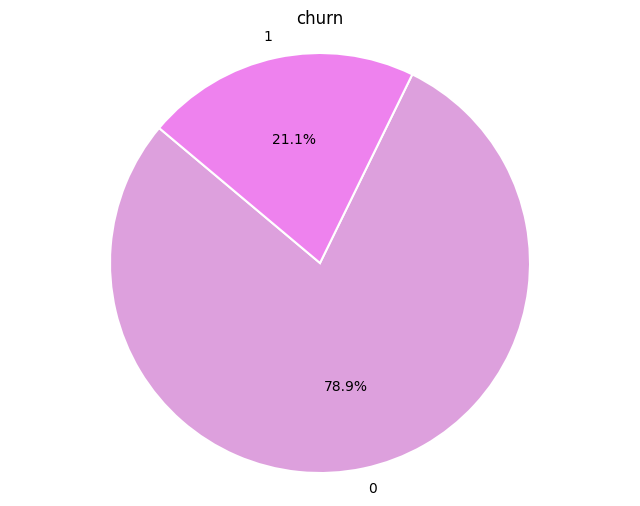

In [10]:
credit_card_counts = df['churn'].value_counts()

colors = ['plum', 'violet', 'slateblue', 'plum']

plt.figure(figsize=(8, 6))
plt.pie(credit_card_counts, labels=credit_card_counts.index, autopct='%1.1f%%', startangle=140, colors=colors,
        wedgeprops=dict(edgecolor='white', linewidth=1.5))
plt.title('churn')
plt.axis('equal')

plt.show()

Dari visualisasi di atas, terlihat bahwa 21.1% customer churn. Jika diperhatikan, data ini menunjukkan class imbalance, namun di sini saya tidak melakukan oversampling karena saya ingin model yang saya latih bisa mengatasi data asli yang ada di real life.

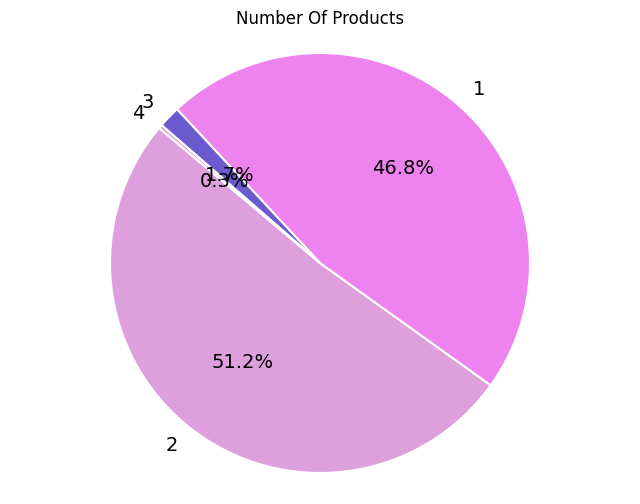

In [11]:
NumOfProducts_counts = df['NumOfProducts'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(NumOfProducts_counts, labels=NumOfProducts_counts.index, autopct='%1.1f%%', startangle=140, colors=colors,
        wedgeprops=dict(edgecolor='white', linewidth=1.5), textprops={'fontsize': 14})
plt.title('Number Of Products')
plt.axis('equal')
plt.show()

Terlihat bahwa sebagian besar number of products adalah 1 dan 2. Di mana Number of products yang bernilai 1 sebesar 46.8%, kemudian yang bernila 2 adalah 51.2%

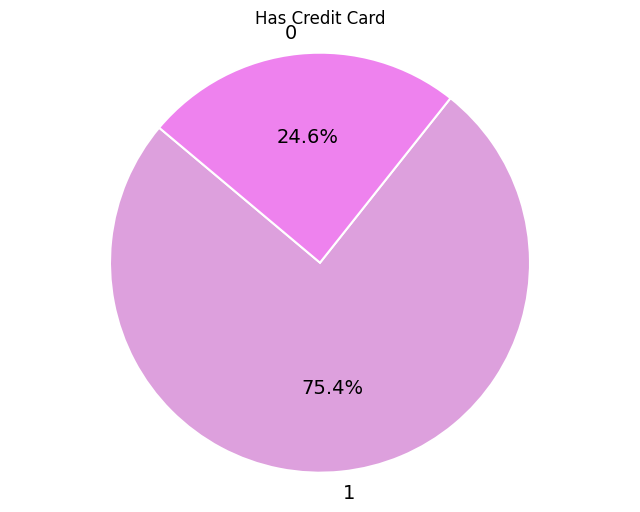

In [12]:
HasCrCard_counts = df['HasCrCard'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(HasCrCard_counts, labels=HasCrCard_counts.index, autopct='%1.1f%%', startangle=140, colors=colors,
        wedgeprops=dict(edgecolor='white', linewidth=1.5), textprops={'fontsize': 14})
plt.title('Has Credit Card')
plt.axis('equal')
plt.show()

Dari data yang digunakan, terlihat bahwa 75.4% customer memiliki credit card.

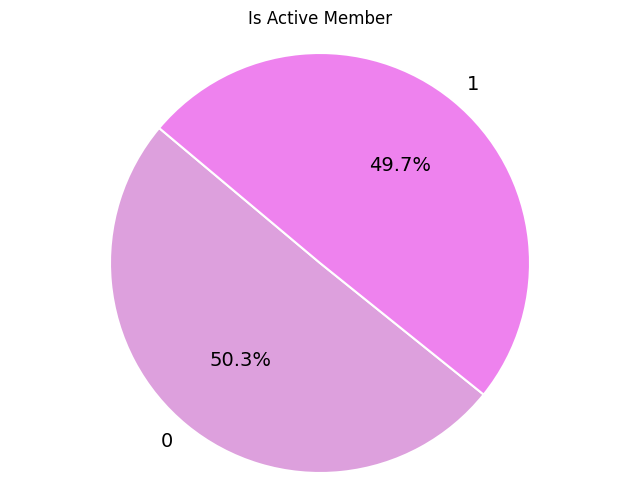

In [13]:
IsActiveMember_counts = df['IsActiveMember'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(IsActiveMember_counts, labels=IsActiveMember_counts.index, autopct='%1.1f%%', startangle=140, colors=colors,
        wedgeprops=dict(edgecolor='white', linewidth=1.5), textprops={'fontsize': 14})
plt.title('Is Active Member')
plt.axis('equal')
plt.show()

Persentase customer merupakan active member sangat mendekati 50:50. Di mana 50.3% bukan active member dan sisanya adalah active member.

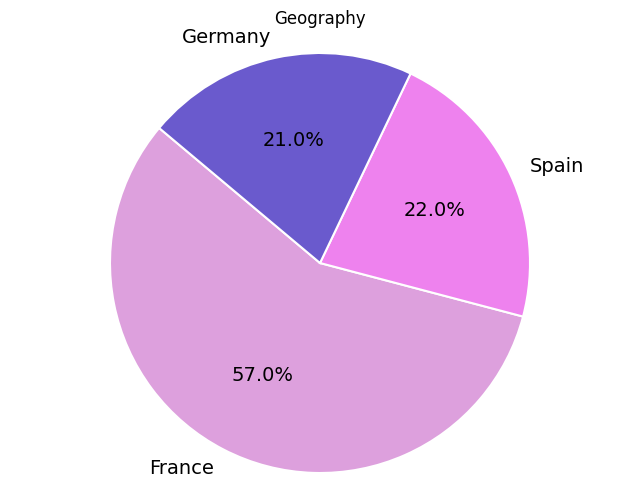

In [14]:
Geography_counts = df['Geography'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(Geography_counts, labels=Geography_counts.index, autopct='%1.1f%%', startangle=140, colors=colors,
        wedgeprops=dict(edgecolor='white', linewidth=1.5), textprops={'fontsize': 14})
plt.title('Geography')
plt.axis('equal')
plt.show()

Pada pie chart di atas, terihat bahwa France merupakan data Geography yang paling banyak.

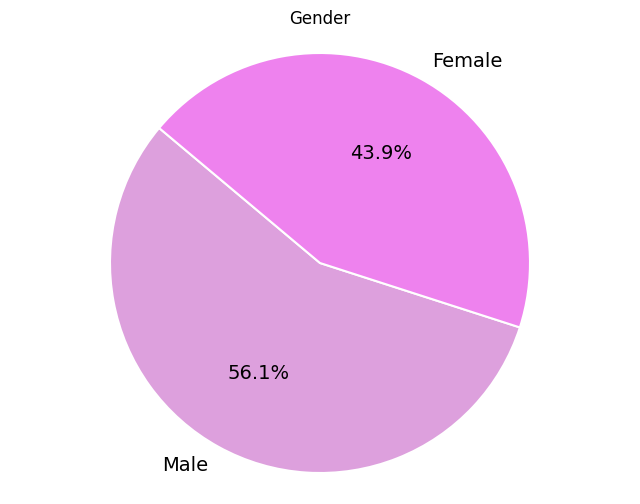

In [15]:
Gender_counts = df['Gender'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(Gender_counts, labels=Gender_counts.index, autopct='%1.1f%%', startangle=140, colors=colors,
        wedgeprops=dict(edgecolor='white', linewidth=1.5), textprops={'fontsize': 14})
plt.title('Gender')
plt.axis('equal')
plt.show()

56% customer pada data ini merupakan laki2 dan sisanya adalah perempuan.

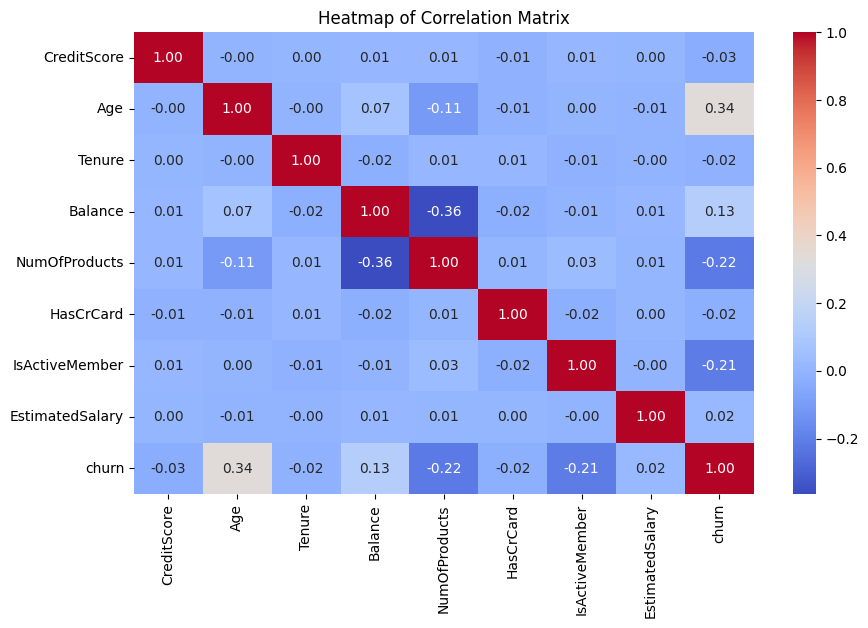

In [17]:
import seaborn as sns

df2 = df.copy()
df2 = df2.drop(columns=['Geography', 'Gender'])
plt.figure(figsize=(10, 6))
sns.heatmap(df2.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlation Matrix')
plt.show()

Terlihat bahwa variabel yang memiliki korelasi paling tinggi dengan target variabel kita adalah Age yang korelasinya sebesar 34%.

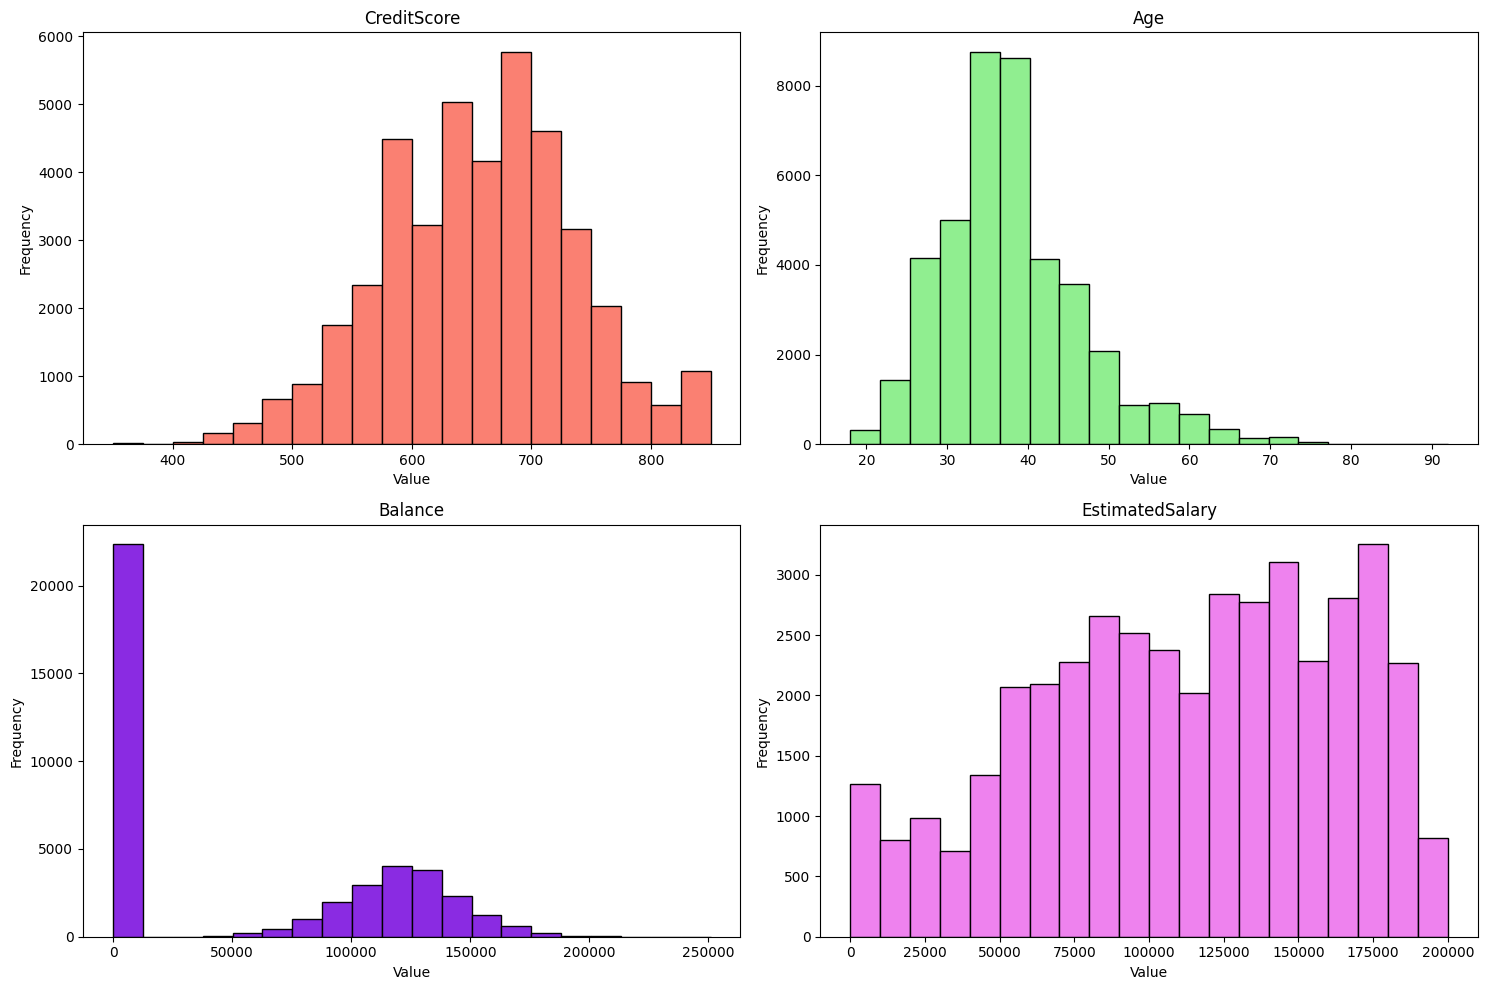

In [18]:
colors = ['salmon', 'lightgreen', 'blueviolet', 'violet', 'slateblue', 'plum']
num_cols = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, start=1):
    plt.subplot(2, 2, i)
    plt.hist(df[col], bins=20, color=colors[i-1], edgecolor='black')
    plt.title(col)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Dari histogram di atas terlihat bahwa Credit Score dengan frekuensi paling banyak berada di range sekitar 575-750. 

Sedangkan pada Age paling banyak customer berusia sekitar 30-40 tahun.

Balance dengan frekuensi terbanyak berada di angka mendekati 0.

Kemudian untuk distribusi estimated salary terlihat adanya peningkatan frekuensi pada angka sekitar 50 ribu dan mengalami penurunan pada frekuensi kembali menurun pada angka sekitar 185 ribu.

# Split

In [11]:
input_df = df.drop('churn',axis=1)
output_df = df['churn']

Di sini saya memisahkan variabel input dan output. Di mana variabel outputnya merupakan target variabel kita yaitu churn.

In [12]:
x_train, x_test, y_train, y_test = train_test_split(input_df, output_df, test_size = 0.2, random_state = 100)

In [13]:
x_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
28727,831.0,Germany,Male,31.0,8,142989.14,2,1,1,29176.09
5522,604.0,France,Female,28.0,9,140856.03,1,0,0,28228.25
9443,614.0,Spain,Female,32.0,3,0.00,2,0,0,120115.50
11491,707.0,France,Male,54.0,5,0.00,2,0,1,66462.82
25102,683.0,France,Male,37.0,6,0.00,1,0,0,121745.48


In [14]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33007 entries, 28727 to 38408
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      33000 non-null  float64
 1   Geography        33007 non-null  object 
 2   Gender           33007 non-null  object 
 3   Age              33007 non-null  float64
 4   Tenure           33007 non-null  int64  
 5   Balance          33007 non-null  float64
 6   NumOfProducts    33007 non-null  int64  
 7   HasCrCard        33007 non-null  int64  
 8   IsActiveMember   33007 non-null  int64  
 9   EstimatedSalary  33007 non-null  float64
dtypes: float64(4), int64(4), object(2)
memory usage: 2.8+ MB


In [15]:
x_train.isnull().sum()

CreditScore        7
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

Terlihat di sini ditemukan missing value pada CreditScore sebanyak 7.

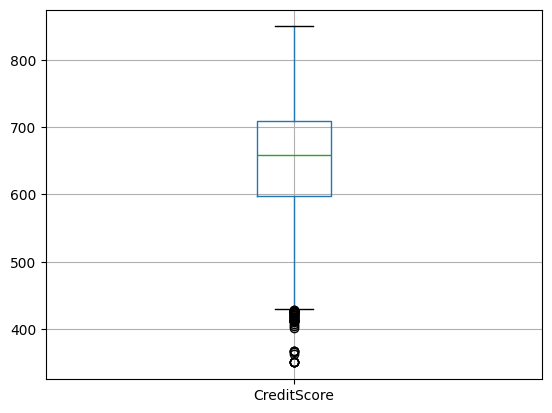

In [16]:
boxplot = x_train.boxplot(column=['CreditScore'])

Karena terdapat outlier pada CreditScore, maka saya akan mengimpute missing value dengan median dari data train CreditScore.

In [17]:
print(x_train['CreditScore'].describe())

count    33000.000000
mean       656.336000
std         80.244529
min        350.000000
25%        598.000000
50%        659.000000
75%        710.000000
max        850.000000
Name: CreditScore, dtype: float64


In [18]:
x_train['CreditScore'].median()

659.0

In [19]:
x_train['CreditScore'].fillna(659, inplace=True)
x_test['CreditScore'].fillna(659, inplace=True)

In [20]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33007 entries, 28727 to 38408
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      33007 non-null  float64
 1   Geography        33007 non-null  object 
 2   Gender           33007 non-null  object 
 3   Age              33007 non-null  float64
 4   Tenure           33007 non-null  int64  
 5   Balance          33007 non-null  float64
 6   NumOfProducts    33007 non-null  int64  
 7   HasCrCard        33007 non-null  int64  
 8   IsActiveMember   33007 non-null  int64  
 9   EstimatedSalary  33007 non-null  float64
dtypes: float64(4), int64(4), object(2)
memory usage: 2.8+ MB


Permasalahan missing value sudah terselesaikan, di sini terlihat bahwa sudah tidak terdapat missing value.

Terdapat 2 feature yang tipe datanya object, yaitu Geography dan Gender.

In [21]:
x_train['Gender'].value_counts()

Gender
Male      18614
Female    14393
Name: count, dtype: int64

Pada gender terdapat 2 unique value yaitu Male dan Female. Maka dari situ saya akan melakukan binary encoding. Di mana saya akan meng-encode Male dengan 1 dan Female dengan 0.

In [22]:
encode = {"Gender": {"Male" : 1,"Female" : 0}}
x_train = x_train.replace(encode)
x_test = x_test.replace(encode)

In [23]:
x_train['Geography'].value_counts()

Geography
France     18802
Spain       7302
Germany     6903
Name: count, dtype: int64

Terdapat 3 unique value pada kolom Geography meliputi France, Spain, dan Germany.

Saya memilih menggunkan One Hot Encoding untuk kolom Geography, saya juga menambahkan kolom Other untuk mengantisipasi adanya value lain pada saat testing.

In [24]:
x_train_encoded = pd.get_dummies(x_train, columns=['Geography'], dtype=int)
x_train_encoded['Geography_Other'] = 0

x_train_encoded.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Geography_Other
28727,831.0,1,31.0,8,142989.14,2,1,1,29176.09,0,1,0,0
5522,604.0,0,28.0,9,140856.03,1,0,0,28228.25,1,0,0,0
9443,614.0,0,32.0,3,0.00,2,0,0,120115.50,0,0,1,0
11491,707.0,1,54.0,5,0.00,2,0,1,66462.82,1,0,0,0
25102,683.0,1,37.0,6,0.00,1,0,0,121745.48,1,0,0,0


In [25]:
x_train = x_train_encoded

In [26]:
x_test_encoded = pd.get_dummies(x_test, columns=['Geography'], dtype=int)
missing_cols = set(x_train_encoded.columns) - set(x_test_encoded.columns)

for col in missing_cols:
    x_test_encoded[col] = 0

x_test_encoded['Geography_Other'] = 0

for col in x_test_encoded.columns:
    if col not in x_train_encoded.columns:
        x_test_encoded['Geography_Other'] = x_test_encoded['Geography_Other'] + x_test_encoded[col]
        x_test_encoded.drop(columns=[col], inplace=True)

x_test = x_test_encoded


In [27]:
x_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Geography_Other
28727,831.0,1,31.0,8,142989.14,2,1,1,29176.09,0,1,0,0
5522,604.0,0,28.0,9,140856.03,1,0,0,28228.25,1,0,0,0
9443,614.0,0,32.0,3,0.00,2,0,0,120115.50,0,0,1,0
11491,707.0,1,54.0,5,0.00,2,0,1,66462.82,1,0,0,0
25102,683.0,1,37.0,6,0.00,1,0,0,121745.48,1,0,0,0


In [28]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33007 entries, 28727 to 38408
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        33007 non-null  float64
 1   Gender             33007 non-null  int64  
 2   Age                33007 non-null  float64
 3   Tenure             33007 non-null  int64  
 4   Balance            33007 non-null  float64
 5   NumOfProducts      33007 non-null  int64  
 6   HasCrCard          33007 non-null  int64  
 7   IsActiveMember     33007 non-null  int64  
 8   EstimatedSalary    33007 non-null  float64
 9   Geography_France   33007 non-null  int64  
 10  Geography_Germany  33007 non-null  int64  
 11  Geography_Spain    33007 non-null  int64  
 12  Geography_Other    33007 non-null  int64  
dtypes: float64(4), int64(9)
memory usage: 3.5 MB


Sekarang seluruh tipe datanya sudah float/int, sehingga data sudah siap untuk digunakan untuk modeling.

# Random Forest 1

In [29]:
RF_1 = RandomForestClassifier(criterion = 'gini', max_depth=5, random_state=100)
RF_1.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, random_state=100)

In [30]:
y_predict = RF_1.predict(x_test)

In [31]:
y_test.value_counts()

churn
0    6492
1    1760
Name: count, dtype: int64

In [32]:
from sklearn.metrics import classification_report

print('Classification Report\n')
print(classification_report(y_test, y_predict, target_names=['0', '1']))

Classification Report

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      6492
           1       0.84      0.35      0.49      1760

    accuracy                           0.85      8252
   macro avg       0.84      0.67      0.70      8252
weighted avg       0.85      0.85      0.82      8252



AUC: 0.6654207276088052


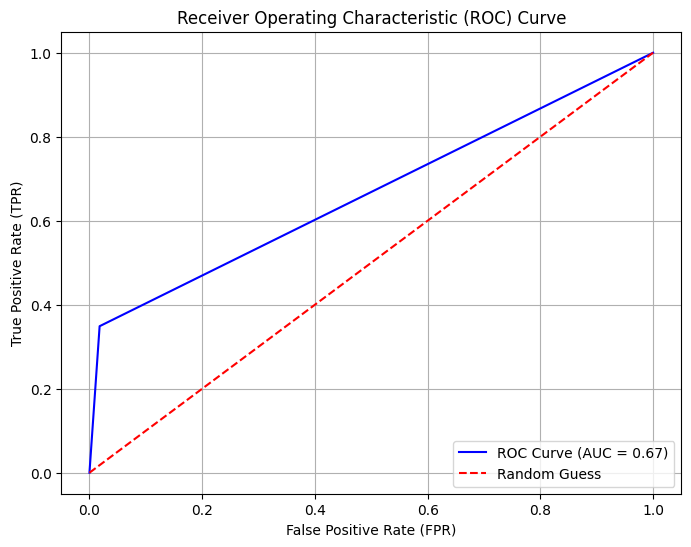

In [33]:
from sklearn.metrics import roc_auc_score, roc_curve

roc_auc = roc_auc_score(y_test, y_predict)
print('AUC:', roc_auc)

fpr, tpr, thresholds = roc_curve(y_test, y_predict)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Random Forest 2

In [34]:
parameters = {
    'criterion':['gini', 'entropy', 'log_loss'],
    'max_depth':[2,3,4,5,6,7,8,9,10],
}

In [35]:
RF_2 = RandomForestClassifier(random_state=100)
RF_2 = GridSearchCV(RF_2, param_grid = parameters,
                    scoring='accuracy', cv=5)

In [36]:
RF_2.fit(x_train,y_train)
best_model = RF_2.best_estimator_

print("Best Tuned Hyperparameters :", RF_2.best_params_)
print("Accuracy :",RF_2.best_score_)

print("Model with Best Accuracy:", best_model)

Best Tuned Hyperparameters : {'criterion': 'entropy', 'max_depth': 10}
Accuracy : 0.8610900480915449
Model with Best Accuracy: RandomForestClassifier(criterion='entropy', max_depth=10, random_state=100)


In [37]:
RF_best = RandomForestClassifier(criterion='entropy', max_depth=10, random_state=100)
RF_best.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, random_state=100)

In [38]:
y_predict = RF_best.predict(x_test)

In [39]:
print('Classification Report\n')
print(classification_report(y_test, y_predict, target_names=['0', '1']))

Classification Report

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      6492
           1       0.78      0.50      0.61      1760

    accuracy                           0.86      8252
   macro avg       0.83      0.73      0.76      8252
weighted avg       0.85      0.86      0.85      8252



AUC: 0.7300763527138296


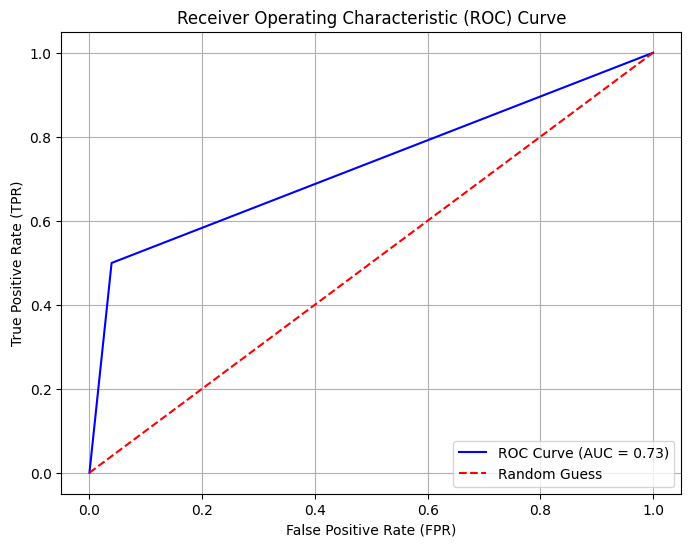

In [40]:
from sklearn.metrics import roc_auc_score, roc_curve

roc_auc = roc_auc_score(y_test, y_predict)
print('AUC:', roc_auc)

fpr, tpr, thresholds = roc_curve(y_test, y_predict)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Xgboost 1

In [41]:
import xgboost as xgb

xgb_1 = xgb.XGBClassifier(random_state=100)
xgb_1.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=100, ...)

In [42]:
y_predict = xgb_1.predict(x_test)

In [43]:
print('Classification Report\n')
print(classification_report(y_test, y_predict, target_names=['0', '1']))

Classification Report

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      6492
           1       0.72      0.55      0.62      1760

    accuracy                           0.86      8252
   macro avg       0.80      0.75      0.77      8252
weighted avg       0.85      0.86      0.85      8252



AUC: 0.7459882442726712


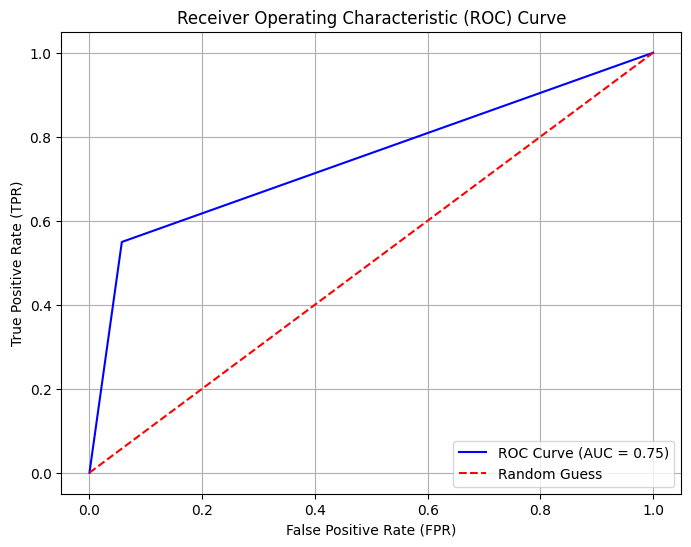

In [44]:
from sklearn.metrics import roc_auc_score, roc_curve

roc_auc = roc_auc_score(y_test, y_predict)
print('AUC:', roc_auc)

fpr, tpr, thresholds = roc_curve(y_test, y_predict)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Xgboost 2

In [45]:
base_estimator = DecisionTreeClassifier(max_depth = 4)

xgb_2 = xgb.XGBClassifier(estimator = base_estimator, n_estimators = 80, random_state=100)
xgb_2.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False,
              estimator=DecisionTreeClassifier(max_depth=4), eval_metric=None,
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=80,
              n_jobs=None, num_parallel_tree=None, ...)

In [46]:
y_predict = xgb_2.predict(x_test)

In [47]:
print('Classification Report\n')
print(classification_report(y_test, y_predict, target_names=['0', '1']))

Classification Report

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      6492
           1       0.73      0.55      0.63      1760

    accuracy                           0.86      8252
   macro avg       0.81      0.75      0.77      8252
weighted avg       0.85      0.86      0.85      8252



AUC: 0.7487230787542709


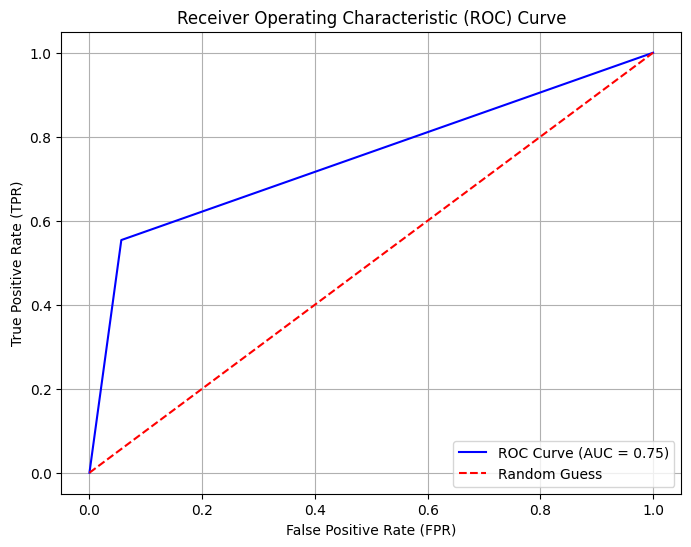

In [48]:
from sklearn.metrics import roc_auc_score, roc_curve

roc_auc = roc_auc_score(y_test, y_predict)
print('AUC:', roc_auc)

fpr, tpr, thresholds = roc_curve(y_test, y_predict)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Pemilihan Model

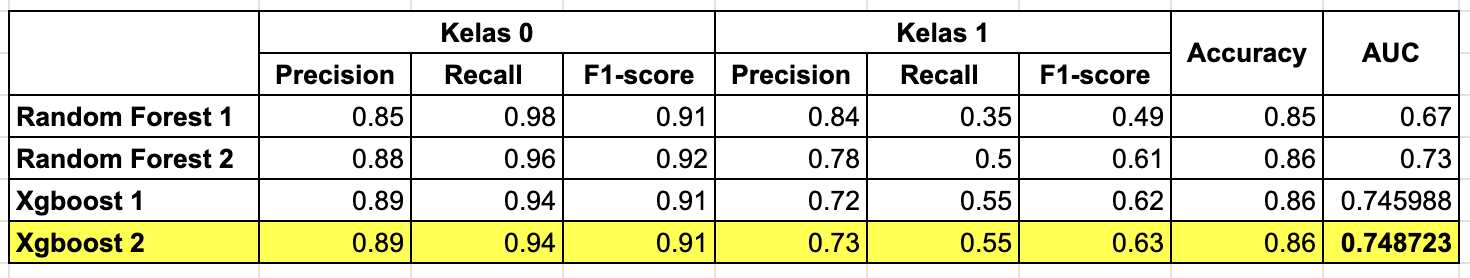

Pada case di sini kita perlu memprediksi churn dan perlu diingat bahwa tadi data kita imbalance. Maka dari itu, saya juga akan memperhitungkan AUC score untuk melihat performa model. Pada tabel di atas terlihat kedua model Xgboost memiliki AUC yang lebih tinggi jika dibandingkan dengan model Random Forest. Maka dari itu saya akan memilih salah satu dari model Xgboost ini. Jika dilihat dari Precision dan F1 Score model Xgboost 2 lebih baik dibandingkan dengan model Xgboost 1. Maka dari itu model yang saya pilih sebagai yang terbaik adalah model Xgboost 2.


In [54]:
filename = 'Xgboost_2.pkl'
pkl.dump(xgb_2, open(filename, 'wb'))